In [1]:

import pandas as pd

# Path to your CSV file
file_path = 'Transportation_Services_Index_and_Seasonally-Adjusted_Transportation_Data.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Preview the first few rows
print(data.head())



           ID    OBS_DATE         ASM     ASM_D11       ASM_D   ASM_D_D11  \
0  SATD200001  01/01/2000  76146639.0  77905058.0  56288872.0  57563420.0   
1  SATD200002  02/01/2000  73011377.0  78588752.0  54329819.0  57831932.0   
2  SATD200003  03/01/2000  80308529.0  79360377.0  59913798.0  58423108.0   
3  SATD200004  04/01/2000  78139993.0  79274744.0  57402637.0  58361163.0   
4  SATD200005  05/01/2000  80515093.0  79096765.0  58896522.0  58181619.0   

        ASM_I   ASM_I_D11         RPM     RPM_D11  ...  IDX_AIR_RPM  \
0  19857767.0  20341639.0  48263245.0  53719168.0  ...       0.9497   
1  18681558.0  20756820.0  48580127.0  55653103.0  ...       0.9793   
2  20394731.0  20937269.0  59632014.0  56803896.0  ...       0.9937   
3  20737356.0  20913581.0  57636732.0  57789237.0  ...       0.9986   
4  21618571.0  20915146.0  59749900.0  59134116.0  ...       1.0337   

   IDX_AIR_RTMFM  IDX_RAIL_FRT_CARLOADS  IDX_RAIL_FRT_INTERMODAL  IDX_RAIL_PM  \
0         0.9629             

In [2]:
# List of columns to keep
selected_columns = ['OBS_DATE', 'TRUCK_D11', 'TSI_Freight', 'TSI_Total', 'IND_PRO', 'MANUF', 'INV_TO_SALES']

# Filter the data
filtered_truck_data = data[selected_columns]

# Preview the filtered data
print(filtered_truck_data.head())


     OBS_DATE  TRUCK_D11  TSI_Freight  TSI_Total     IND_PRO       MANUF  \
0  01/01/2000       79.9        105.0      101.9   98.831780  100.690177   
1  02/01/2000       78.2        103.0      101.3   99.172683   97.084809   
2  03/01/2000       74.7         99.8       99.7   99.560293   99.767561   
3  04/01/2000       72.6         97.9       98.5  100.190526  101.496288   
4  05/01/2000       73.2         98.8      100.0  100.481153   99.714734   

   INV_TO_SALES  
0          1.58  
1          1.56  
2          1.55  
3          1.58  
4          1.59  


In [3]:
# Save the filtered data to a new CSV
filtered_file_path = 'filtered_transportation_data.csv'
filtered_truck_data.to_csv(filtered_file_path, index=False)

print(f"Filtered data saved to {filtered_file_path}")


Filtered data saved to filtered_transportation_data.csv


In [6]:
import pandas as pd

# Load the file (adjust delimiter if needed, e.g., ',' or '\t')
df = pd.read_csv("filtered_transportation_data.csv")

# Save the file with proper formatting
df.to_csv("cleaned_transportation_data.csv", index=False, sep=",")


In [3]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Metric Pair', 'Correlation'], dtype='object')


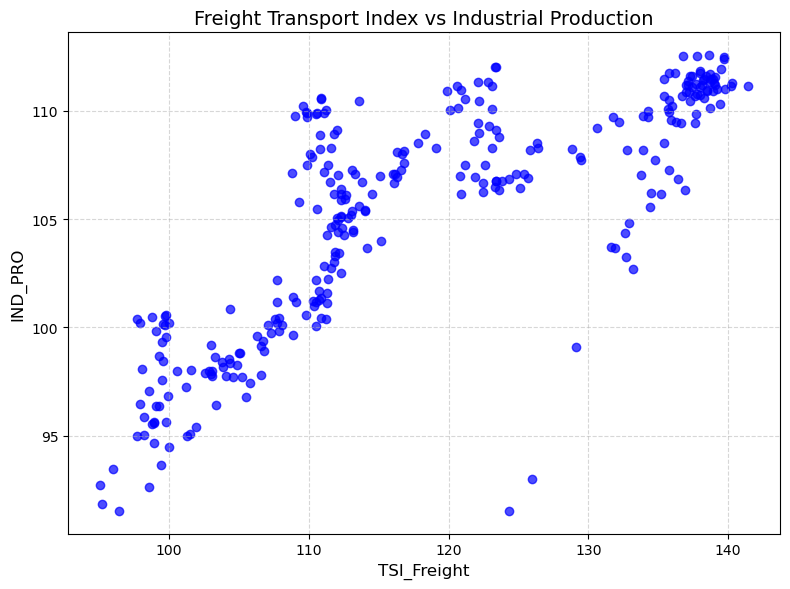

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Transportation_Services_Index_and_Seasonally-Adjusted_Transportation_Data.csv'
data = pd.read_csv(file_path)
df_subset = data[["TSI_Freight", "IND_PRO"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(
    df_subset["TSI_Freight"],
    df_subset["IND_PRO"],
    color="blue", alpha=0.7
)
plt.title("Freight Transport Index vs Industrial Production", fontsize=14)
plt.xlabel("TSI_Freight", fontsize=12)
plt.ylabel("IND_PRO", fontsize=12)
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()



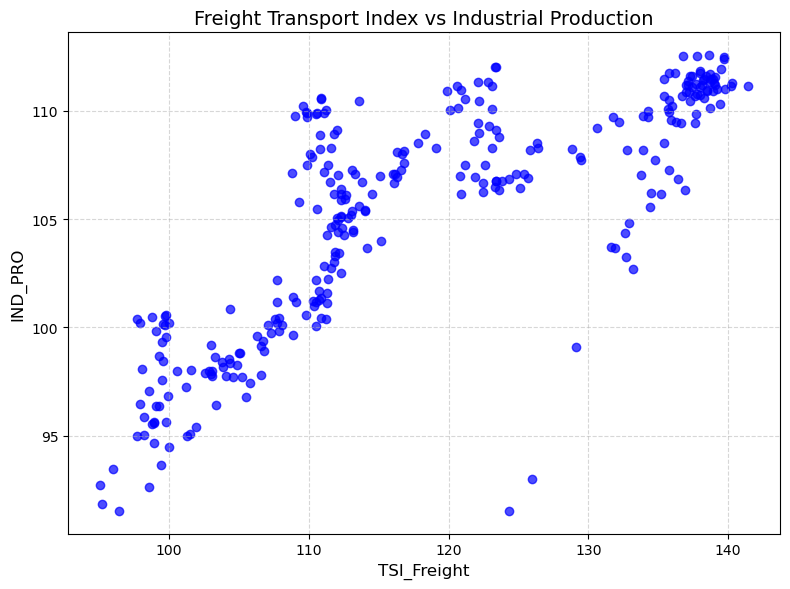

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Transportation_Services_Index_and_Seasonally-Adjusted_Transportation_Data.csv'

data = pd.read_csv(file_path)

df_subset = data[["TSI_Freight", "IND_PRO"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(
    df_subset["TSI_Freight"],
    df_subset["IND_PRO"],
    color="blue", alpha=0.7
)
plt.title("Freight Transport Index vs Industrial Production", fontsize=14)
plt.xlabel("TSI_Freight", fontsize=12)
plt.ylabel("IND_PRO", fontsize=12)
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()



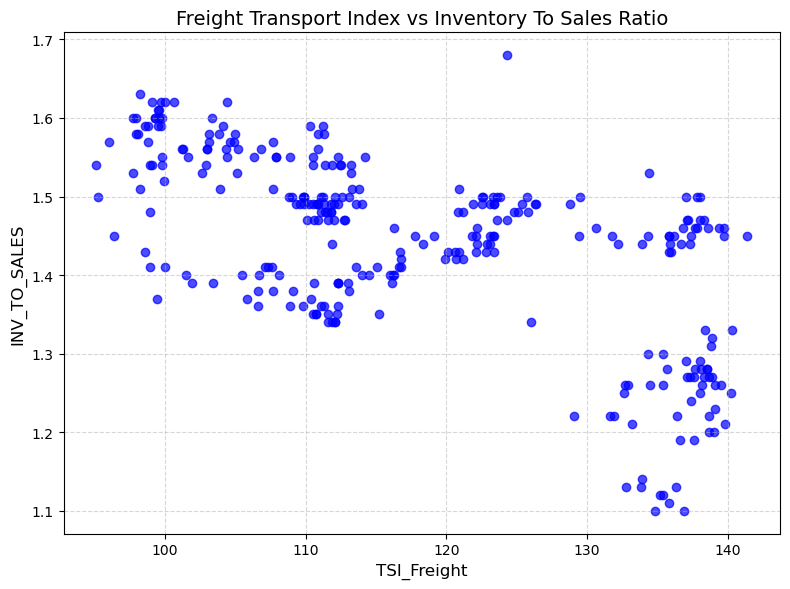

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_subset_2 = data[["TSI_Freight", "INV_TO_SALES"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(
    df_subset_2["TSI_Freight"],
    df_subset_2["INV_TO_SALES"],
    color="blue", alpha=0.7
)
plt.title("Freight Transport Index vs Inventory To Sales Ratio", fontsize=14)
plt.xlabel("TSI_Freight", fontsize=12)
plt.ylabel("INV_TO_SALES", fontsize=12)
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()



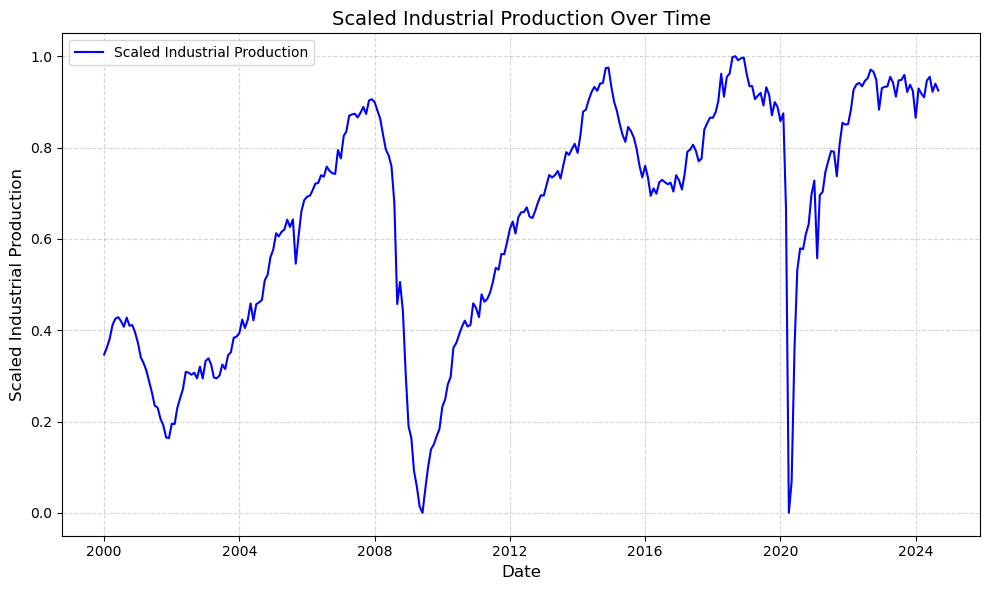

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
#file_path = "path/to/your/csv_file.csv"  # Replace with your file's path
#df = pd.read_csv(file_path)

# Ensure correct column names and clean any extra spaces
#df.columns = data.columns.str.strip().str.lower()


df_time_series = data[["OBS_DATE", "IND_PRO"]].dropna()
df_time_series["OBS_DATE"] = pd.to_datetime(df_time_series["OBS_DATE"])
scaler = MinMaxScaler()
df_time_series["scaled_industrial_production"] = scaler.fit_transform(
    df_time_series[["IND_PRO"]]
)
plt.figure(figsize=(10, 6))
plt.plot(
    df_time_series["OBS_DATE"],
    df_time_series["scaled_industrial_production"],
    label="Scaled Industrial Production",
    color="blue",
)
plt.title("Scaled Industrial Production Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Scaled Industrial Production", fontsize=12)
plt.grid(alpha=0.5, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

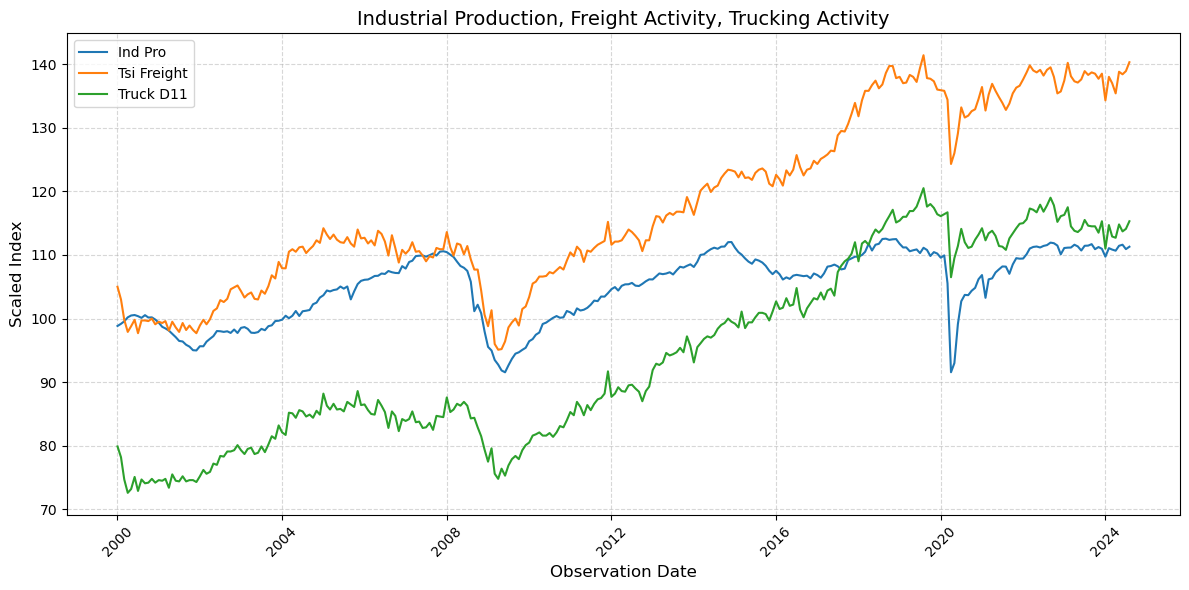

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


df['OBS_DATE'] = pd.to_datetime(df['OBS_DATE'])
df = df.sort_values('OBS_DATE')
columns_to_plot = ['IND_PRO', 'TSI_Freight', 'TRUCK_D11']
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(df['OBS_DATE'], df[column], label=column.replace('_', ' ').title())
plt.xlabel('Observation Date', fontsize=12)
plt.ylabel('Scaled Index', fontsize=12)
plt.title('Industrial Production, Freight Activity, Trucking Activity', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



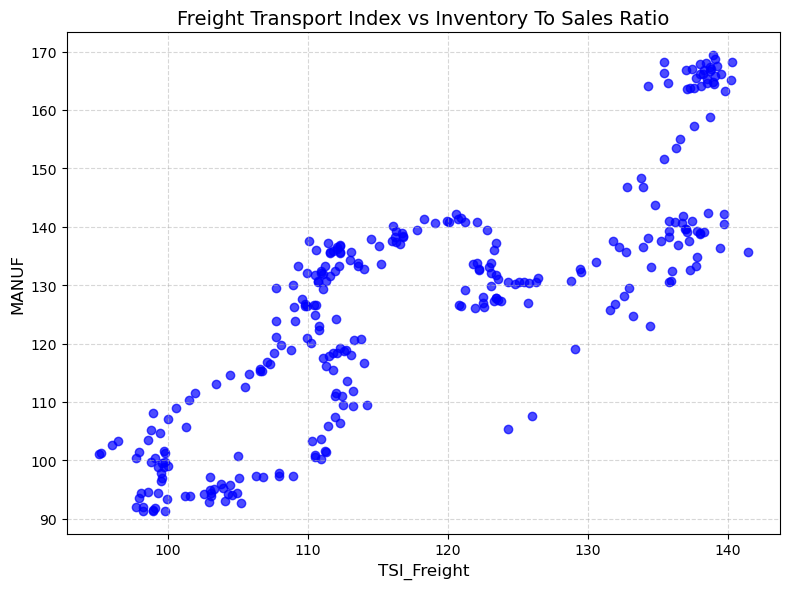

In [18]:
df_subset_3 = data[["TSI_Freight", "MANUF"]].dropna()
plt.figure(figsize=(8, 6))
plt.scatter(
    df_subset_3["TSI_Freight"],
    df_subset_3["MANUF"],
    color="blue", alpha=0.7
)
plt.title("Freight Transport Index vs Inventory To Sales Ratio", fontsize=14)
plt.xlabel("TSI_Freight", fontsize=12)
plt.ylabel("MANUF", fontsize=12)
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()
